<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/3.%20Image%20Processing/2_ImageProcessing_Blending_Pasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Image Processing (Blending and Pasting)

In this section we will discuss blending and pasting techniques that are often used to blend images together and pasting images on top of each other with help of OpenCV.


---

Blending images :

- done through <b> addWeighted function </b> that uses both images and combines them.
- formula used:
\begin{align*}
\mathrm{new~pixel} = \alpha \times \mathrm{pixel_1}+\beta \times \mathrm{pixel_2}+\gamma
\end{align*}

  where $\alpha,\beta$ are weigthed coefficients and $\gamma$ for further blended image
- if you want pixel 1 from 1st iamge to be more represented, we would make a higher $\alpha$ value and same case for other image.

In [1]:
import cv2

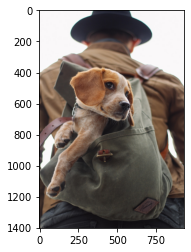

In [2]:
img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')

#converting them in proper image color format
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img1)

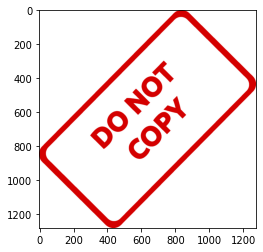

In [3]:
plt.imshow(img2)

In [4]:
# As it is seen these are not of same size
print('Image1 size: ',img1.shape)
print('Image2 size: ',img2.shape)

Image1 size:  (1401, 934, 3)
Image2 size:  (1280, 1277, 3)


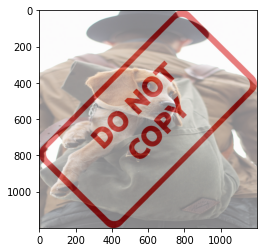

In [5]:
#Before blending, we need to resize (it is easier) else we can also blend images of different sizes that we will see later.

img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

#both images same intensity in blenifing
alpha=0.5
beta=0.5

blended = cv2.addWeighted(img1,alpha,img2,beta,gamma=0)
plt.imshow(blended)

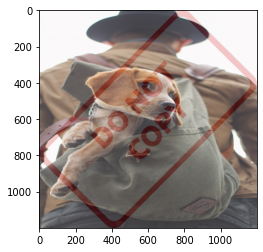

In [6]:
# To have image 1 to shine more
alpha=0.8
beta=0.2

blended1 = cv2.addWeighted(img1,alpha,img2,beta,0)
plt.imshow(blended1)

In [7]:
# BLENDING USING DIFFERENT IMAGE SIZES
#Overlay smaller image over larger image

img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')

#converting them in proper image color format
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2,(600,600)) #resize second image to make it smaller

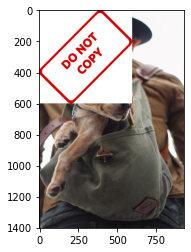

In [8]:
#Using numpy reassignment operator

large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1] #offset and length of image in smaller image
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end,x_offset:x_end] = small_img

plt.imshow(large_img)

##### Masking s smaller image inside larger image

Three stages:
 
- We need image that we need to mask on
- Build a mask
- Paste the mask with image onto another image

In [9]:
img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')

#converting them in proper image color format
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2,(600,600)) #resize second image to make it smaller

In [10]:
#creating a region of interest - to choose where to mask smaller image on smaller image

img1.shape

(1401, 934, 3)

In [11]:
x_offset = img1.shape[1]-img2.shape[1]
y_offset = img1.shape[0]-img2.shape[0]

rows,cols,channels = img2.shape

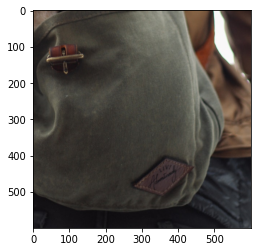

In [12]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[0]]
plt.imshow(roi)

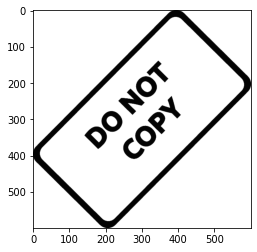

In [13]:
#creating a mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY) #gray scale image
plt.imshow(img2gray,cmap='gray')

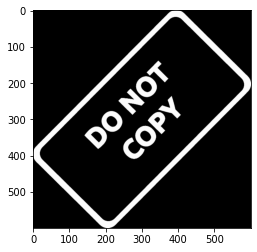

In [14]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray') #inverse bitwise to gray image

In [15]:
mask_inv.shape #no color channels

(600, 600)

In [16]:
import numpy as np

white_background = np.full(img2.shape,255,dtype=np.uint8) #full pool up 255
white_background.shape

(600, 600, 3)

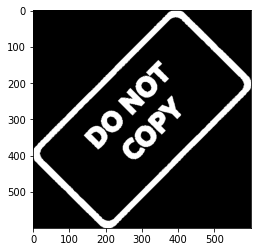

In [19]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv) #basically put white background and white background and put mask on it
plt.imshow(bk)

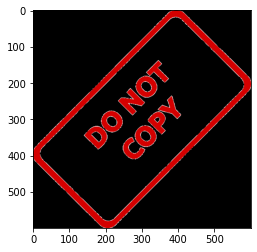

In [20]:
foreground = cv2.bitwise_or(img2,img2,mask=mask_inv) # so simply mask (hide original iamge with the mask)
plt.imshow(foreground)

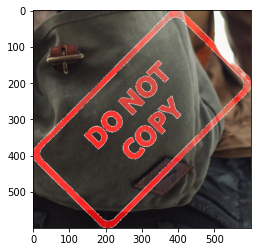

In [21]:
#mask wirh roi

final_roi = cv2.bitwise_or(roi,foreground)
plt.imshow(final_roi)

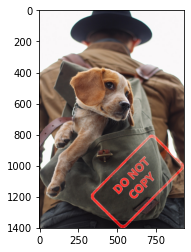

In [22]:
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)